In [159]:
import pandas as pd
import numpy as np

In [160]:
df=pd.read_csv("playgolf_data.csv")

In [161]:
df

,Outlook,Temperature,Humidity,Wind,PlayGolf
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rainy,Mild,High,Weak,Yes
4,Rainy,Cool,Normal,Weak,Yes
5,Rainy,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rainy,Mild,Normal,Weak,Yes


In [162]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[['Sunny', 'Overcast', 'Rainy'],['Cool', 'Mild', 'Hot'], ['Normal', 'High'],  ['Weak', 'Strong']])
df[['Outlook','Temperature', 'Humidity',  'Wind']] = ordinal_encoder.fit_transform(df[['Outlook', 'Temperature', 'Humidity', 'Wind']])


In [163]:
df

,Outlook,Temperature,Humidity,Wind,PlayGolf
0,0.0,2.0,1.0,0.0,No
1,0.0,2.0,1.0,1.0,No
2,1.0,2.0,1.0,0.0,Yes
3,2.0,1.0,1.0,0.0,Yes
4,2.0,0.0,0.0,0.0,Yes
5,2.0,0.0,0.0,1.0,No
6,1.0,0.0,0.0,1.0,Yes
7,0.0,1.0,1.0,0.0,No
8,0.0,0.0,0.0,0.0,Yes
9,2.0,1.0,0.0,0.0,Yes


In [164]:
X=df.drop('PlayGolf',axis=1)
y=df['PlayGolf']

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [166]:
y_train

8     Yes
2     Yes
1      No
13     No
4     Yes
7      No
10    Yes
3     Yes
6     Yes
Name: PlayGolf, dtype: object

In [167]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='gini',max_depth=3, min_samples_split=2,min_samples_leaf=2)
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [168]:
y_test

9     Yes
11    Yes
0      No
12    Yes
5      No
Name: PlayGolf, dtype: object

In [169]:
predictions

array(['Yes', 'Yes', 'No', 'Yes', 'Yes'], dtype=object)

In [170]:
from sklearn import metrics
cf=metrics.confusion_matrix(y_test,predictions)
cf

array([[1, 1],
       [0, 3]], dtype=int64)

In [171]:
#print("Original Labels",X_test)
#print("Labels Predicted",prediction)
from sklearn.metrics import accuracy_score
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=dtree.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=predictions))

Train data accuracy: 0.8888888888888888
Test data accuracy: 0.8


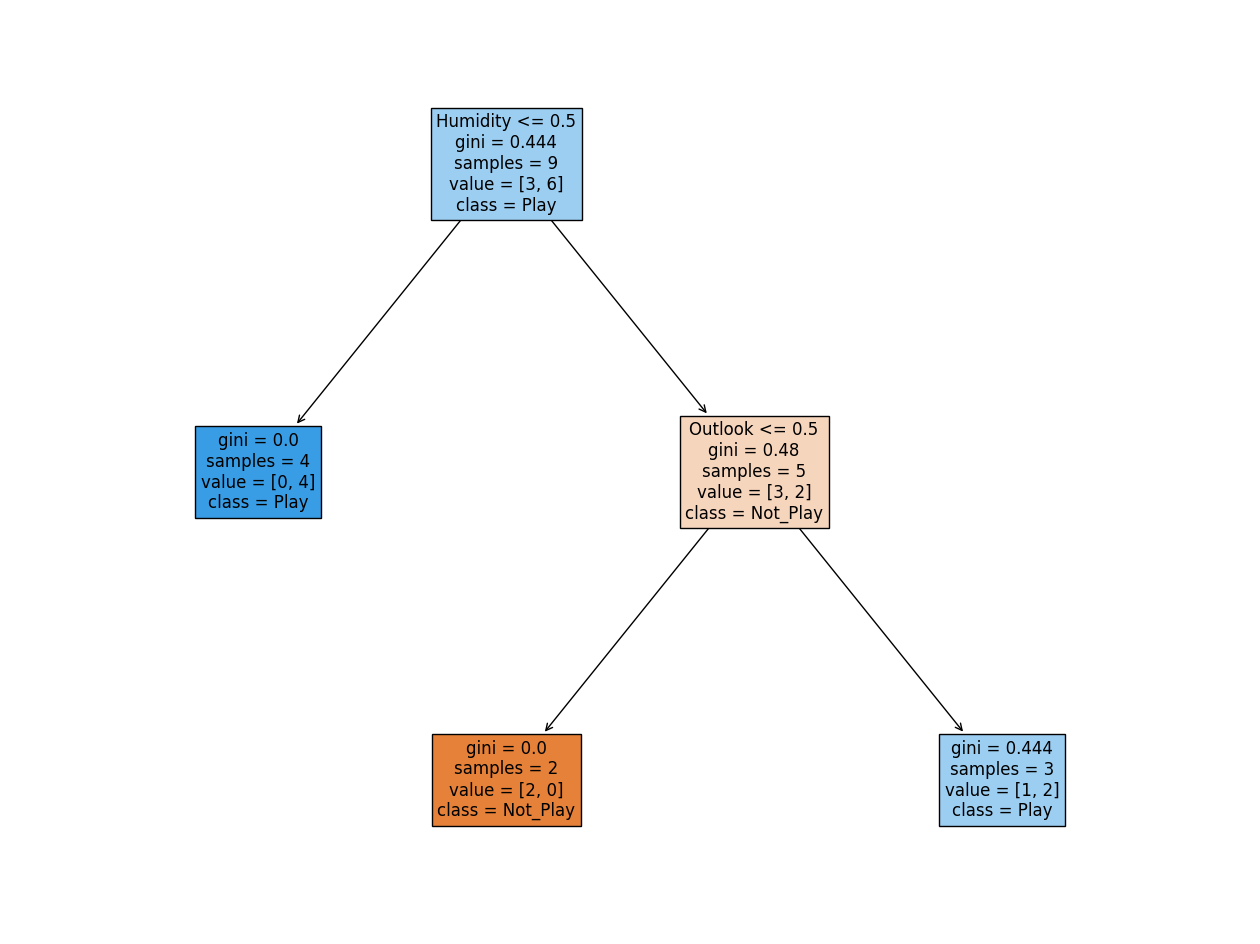

In [172]:
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,12))
a = plot_tree(dtree, feature_names=X.columns, fontsize=12, filled=True,class_names=['Not_Play', 'Play'])

In [173]:
feature_importances = dtree.feature_importances_

# Now, feature_importances contains the importance of each feature
# You can print or analyze this array to understand which features contribute most to the decision making
print("Feature importances:")

Feature importances:


In [174]:
from sklearn.model_selection import cross_val_score

# Assuming dtree is your trained decision tree classifier and X, y are your feature matrix and target variable
# Replace dtree, X, and y with your actual trained classifier, feature matrix, and target variable

# Compute cross-validation scores (using 5-fold cross-validation as an example)
cv_scores = cross_val_score(dtree, X, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()
print("Mean Cross-validation score:", mean_cv_score)
print("Standard Deviation of Cross-validation scores:", std_cv_score)


Cross-validation scores: [0.33333333 0.66666667 0.33333333 0.33333333 0.5       ]
Mean Cross-validation score: 0.4333333333333333
Standard Deviation of Cross-validation scores: 0.13333333333333333
